<a href="https://colab.research.google.com/github/GuptaRitik/PlayStore-Review-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Play Store App Reviews EDA

### Started by Importing the required Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Data

df = pd.read_csv('/content/drive/MyDrive/DS_Almabetter /Python/Play Store Review Analysis – Ritik Gupta/Play Store Data.csv')

In [4]:
# Checking and reviewing the initials of the data
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# **Cleaning the DataFrame** 

*   Checking for outliers in important column with respect to analysis
*   Dropping the outliers (if any)
*   Taking care of Null Values
*   Converting values of columns for further operation

In [5]:
# using describe to check the min, 25%, 50%, 75%, max reviews
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In play store max rating is 5.0 and as we can see in the description, it shows a value beyond the max rating of 5.0, its called an outlier let's visualise it using a graph

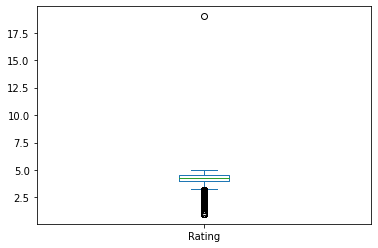

In [6]:
# using Boxplot to show the outliers in 'Rating' column
df['Rating'].plot(kind='box');

In [7]:
# Dropping the outlier because its data is inappropriate and not usefull for analysis
df.drop(df[df['Rating']>5.0].index, axis=0, inplace=True)

#new shape of Data frame after dropping outlier
df.shape

(10840, 13)

## Taking Care of Null values

In [8]:
# checking the number of null values presented in each column

df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

To get the max results from our analysis, we are filling null values of 'Rating' with median Ratings of its respective 'Category'.

In [9]:
# to fill with 'Category' median, we are using groupby and transform method

df["Rating"] = df.groupby("Category")['Rating'].transform(lambda x: x.fillna(x.median()))

Now filling null values of 'Type',  'Current Ver',  'Android Ver' columns with their modes respectively.

In [10]:
# filling mode of themselves in null values of columns using fillna method

df['Type'].fillna(df['Type'].mode()[0], inplace=True) # we used [0] because we are taking value at 0th index of the mode() output
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


as seen in info, Object is the Data Type of following column- 

*   Price
*   Review
*   Installs

we need to change it to their preferred type of integer and float

In [12]:
# for Price
# 1. removing the '$' sign in 'Price' column
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
# 2. converting the string type price to float type 
df['Price'] = df['Price'].apply(lambda x: float(x))


# for Review, we use pandas 'to neumeric' method cause it has large numbers
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')


# for Installs, 
# 1. we first replace unwanted characters from numeric string
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').str.replace('-','')
# 2. now we convert it to integer using apply method
df['Installs'] = df['Installs'].apply(lambda x: int(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## Values of 'Size' column in data are of string format and in MB or KB so we are converting them to MB for optimum results.

In [13]:
df['Size']= df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x) #     Replacing 'M' from string of Size
df['Size']= df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size']= df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x) #converting Kb of size to MB by dividing to 1000
df['Size']= df['Size'].apply(lambda x: float(x)) # converting all values to float

df['Size'].fillna(float(int(df['Size'].mean())), inplace=True) # filled nan values of size with the mean of size

In [14]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# **Now we cleared our data and its time to get summary of Data using visualisation tools**



## Calculating average rating 

In [15]:
# finding the most frequent rating given to apps
print(f"{df['Rating'].value_counts().nlargest(1).index[0]} is the most frequent rating given to {df['Rating'].value_counts().nlargest(1).values[0]} apps")

# Finding the average rating given to apps
print(f"the average rating in dataset is {round(df['Rating'].mean(),1)}")

4.3 is the most frequent rating given to 1979 apps
the average rating in dataset is 4.2
